In [1]:
import numpy as np
import pandas as pd
import sklearn.neighbors
import sklearn.model_selection
import sklearn.datasets
import sklearn.manifold
import sklearn.decomposition

In [2]:
def score_embedding(data, labels, k=10, n_neighbors=5, random_state=42):
    model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    cv = sklearn.model_selection.StratifiedKFold(n_splits=k, random_state=random_state)
    return sklearn.model_selection.cross_val_score(model, data, labels, cv=cv)

In [3]:
def compare_embeddings(embeddings, n_neighbors=5, k=10, random_state=42):
    cross_val_scores = {}
    for alg in embeddings.keys():
        cross_val_scores[alg] = score_embedding(embeddings[alg][['x', 'y']].values, 
                                                embeddings[alg]['labels'].values,
                                                n_neighbors=n_neighbors,
                                                k=k,
                                                random_state=random_state)
    return pd.DataFrame(cross_val_scores).assign(n_neighbors=n_neighbors)

In [4]:
shuttle = {}
shuttle['tsne'] = pd.read_csv('embedding_shuttle_tsne.csv', index_col=0)
shuttle['umap'] = pd.read_csv('embedding_shuttle_umap.csv', index_col=0)
shuttle['lvis'] = pd.read_csv('embedding_shuttle_largevis1.csv', index_col=0)
shuttle['fits'] = pd.read_csv('embedding_shuttle_fitsne1.csv', index_col=0)
shuttle['leig'] = pd.read_csv('embedding_shuttle_eigenmaps.csv', index_col=0)
shuttle['pca'] = pd.read_csv('embedding_shuttle_pca.csv', index_col=0)

In [5]:
df = pd.concat(compare_embeddings(shuttle, n_neighbors=n, k=10) for n in (100,200,400,800,1600,3200))

In [6]:
df.groupby('n_neighbors').mean()

,tsne,umap,lvis,fits,leig,pca
n_neighbors,,,,,,
100,0.994379,0.992931,0.992103,0.993207,0.962224,0.832621
200,0.992241,0.989845,0.987069,0.989397,0.956948,0.820828
400,0.990207,0.988155,0.976173,0.981569,0.948914,0.814672
800,0.968517,0.988466,0.957241,0.961328,0.941569,0.804172
1600,0.926569,0.981104,0.904293,0.933983,0.918189,0.792138
3200,0.827724,0.957241,0.850430,0.859949,0.894535,0.785914


In [7]:
df.groupby('n_neighbors').std() * 2

,tsne,umap,lvis,fits,leig,pca
n_neighbors,,,,,,
100,0.002127,0.002496,0.003122,0.002545,0.003998,0.012838
200,0.001950,0.002292,0.003053,0.003471,0.006020,0.007306
400,0.002445,0.002274,0.002975,0.003335,0.005765,0.006987
800,0.005085,0.002143,0.003711,0.004482,0.005708,0.003374
1600,0.004735,0.002421,0.006620,0.006326,0.006455,0.002544
3200,0.004041,0.005485,0.008154,0.002454,0.005905,0.000504


In [8]:
import seaborn as sns
sns.set()

In [9]:
tidy_df = df.reset_index().melt(id_vars=['index', 'n_neighbors'], 
                                value_vars=['fits', 'leig', 'lvis', 'pca', 'tsne', 'umap'])
tidy_df = tidy_df.rename(columns={'index':'fold', 'variable':'algorithm'})
tidy_df = tidy_df[tidy_df.algorithm != 'fits']

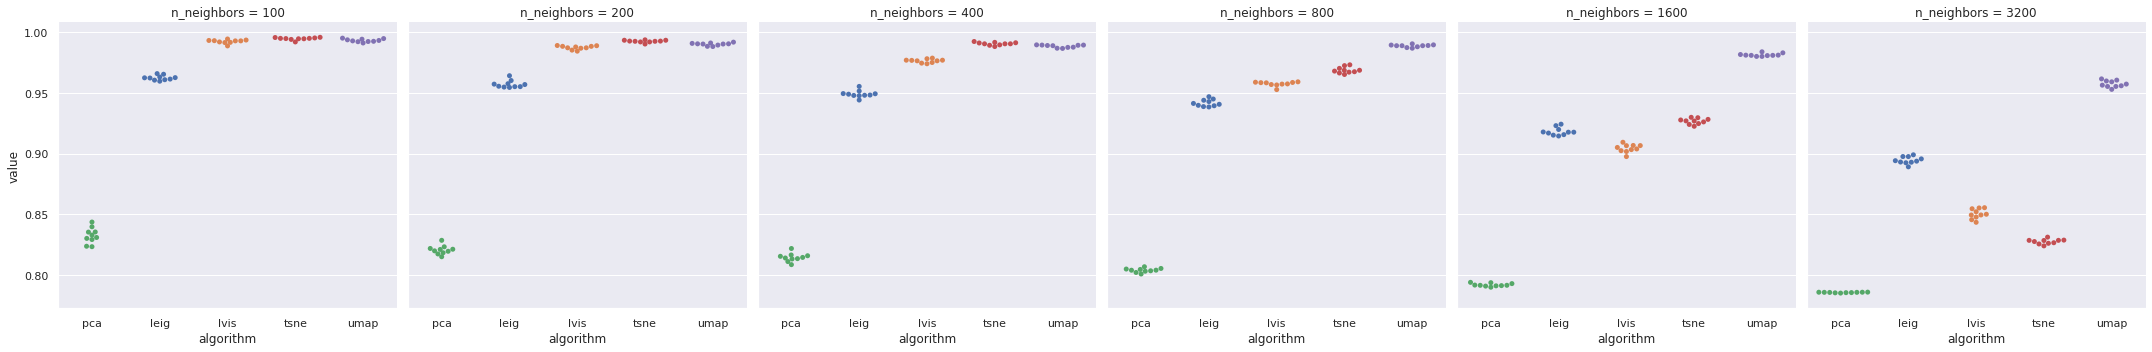

In [11]:
sns.catplot(x='algorithm', 
            y='value', 
            hue='algorithm', 
            kind='swarm', 
            col='n_neighbors',
            order=['pca', 'leig', 'lvis', 'tsne', 'umap'],
            data=tidy_df)